In [1]:
import numpy as np
import pandas as pd
from matplotlib import font_manager , rc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='Malgun Gothic')

In [75]:
df = pd.read_csv('./생필품 농수축산물 가격 정보(2021년1월_6월).csv', 
                 encoding='cp949',low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42699 entries, 0 to 42698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               42699 non-null  int64 
 1   시장/마트 번호           42699 non-null  int64 
 2   시장/마트 이름           42699 non-null  object
 3   품목 번호              42699 non-null  int64 
 4   품목 이름              42699 non-null  object
 5   실판매규격              42699 non-null  object
 6   가격(원)              42699 non-null  int64 
 7   년도-월               42699 non-null  object
 8   비고                 42425 non-null  object
 9   시장유형 구분(시장/마트) 코드  42699 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  42699 non-null  object
 11  자치구 코드             42699 non-null  int64 
 12  자치구 이름             42699 non-null  object
 13  점검일자               42699 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.6+ MB


In [7]:
df.isna().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [10]:
# df.dropna(inplace=True)
df['시장/마트 번호'].nunique()

102

In [11]:
df['시장/마트 이름'].unique()

array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
       'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
       '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
       '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
       '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
       '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
       '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
       '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
       '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
       '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
       '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
       '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
       '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
       '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
       '둔촌역전통시장', '홈플러스 월드컵점', '도곡시장', '신원시장(신림1동)',

In [76]:
#시장/마트 목록
df_market = df[['시장/마트 번호','시장/마트 이름','자치구 이름',
                '시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [15]:
#자치구별 시장/마트 갯수
df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [17]:
# 자치구 이름으로 시장/마트 확인
df_market[df_market['자치구 이름'] == '중구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
21,56,롯데백화점,중구,대형마트
257,60,이마트 청계점,중구,대형마트
576,11,남대문시장,중구,전통시장
3799,8,롯데마트 서울역점,중구,대형마트
4920,199,서울중앙시장,중구,전통시장


In [22]:
#물품 목록
df_items = df[['품목 번호', '품목 이름']].drop_duplicates()
df_items[60:]

,품목 번호,품목 이름
1550,318,"고등어(30cm,수입산)"
1820,284,배(중품)
1898,118,"호박(인큐베이터),중간"
2191,272,양파(작은망)
2432,274,"무(세척무, 중)"
2457,265,"명태(생물,수입산)"
2466,175,배추(중간)
2567,255,"오징어(생물,수입산)"
2620,54,오징어(냉동)
3706,313,"냉동참조기(20cm,수입)"


In [26]:
df_gu = df[['자치구 코드', '자치구 이름']].drop_duplicates()
df_gu.shape

(25, 2)

In [28]:
#시장유형
df[['시장유형 구분(시장/마트) 코드',
    '시장유형 구분(시장/마트) 이름']].drop_duplicates()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


In [77]:
#삼격살의 가격 분석
#특정 문자열이 포함되어 있는지 확인 .str.contains(문자열)
#2021-06 
df_3= df[(df['품목 이름'].str.contains('삼겹살'))&
         (df['년도-월']=='2021-06') & 
         (df['실판매규격'].str.contains('600g'))]


In [34]:
df_3.shape

(224, 14)

In [45]:
#삼겹살 가격의 평균
df_3['가격(원)'].mean()

16842.723214285714

In [46]:
#최대값
df_3['가격(원)'].max()

In [47]:
#조건 : 5000원이하인 시정/마트이름

In [48]:
#최저가
df_3['가격(원)'].min()

1690

In [50]:
df3 = df_3[df_3['가격(원)'] <= 5000]

In [54]:
df3[['가격(원)','시장/마트 이름']]

,가격(원),시장/마트 이름
3645,2720,이마트 창동점
4052,1690,홈플러스 방학점


In [79]:
# 우리동네 삼겹살 가격
gu = input('구이름: ')
df_3gu = df_3[df_3['자치구 이름']== gu][['시장/마트 이름', '품목 이름', 
          '실판매규격', '가격(원)']].drop_duplicates()


구이름: 마포구


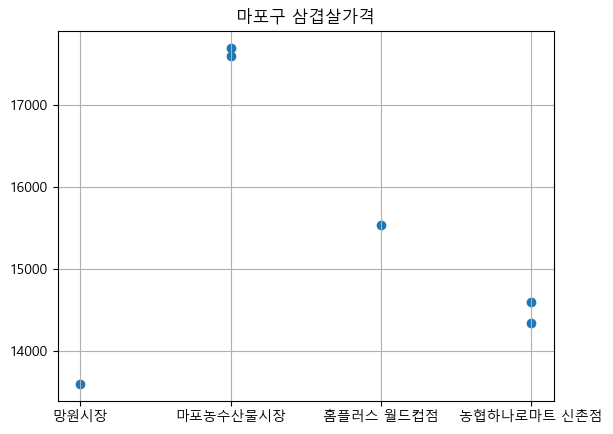

In [80]:
#시각화
x=df_3gu['시장/마트 이름']
y=df_3gu['가격(원)']
plt.scatter(x,y)
plt.title(gu+' 삼겹살가격')
plt.grid()
plt.show()


In [85]:
#마트 지점별 삼겹살 가격
mart = input('시장/마트이름 :') # 입력 백화점
#마트 지점별 삼겹살 가격
df_mart=df_3[df_3['시장/마트 이름'].str.contains(mart)][['시장/마트 이름', '품목 이름', 
         '실판매규격', '가격(원)']].drop_duplicates()
df_mart

시장/마트이름 :백화점


,시장/마트 이름,품목 이름,실판매규격,가격(원)
22,현대백화점 미아점,돼지고기(생삼겹살),"600g (100g 4,280원)",25680
47,롯데백화점 노원점,돼지고기(생삼겹살),600g,26940
457,현대백화점 신촌점,돼지고기(생삼겹살),600g(1등급),25700
2576,태평백화점,돼지고기(생삼겹살),600g,21360
2617,태평백화점,돼지고기(생삼겹살),600g,19000
2661,태평백화점,돼지고기(생삼겹살),600g,23760
2681,태평백화점,돼지고기(생삼겹살),600g,20160
2751,롯데백화점 영등포점,돼지고기(생삼겹살),600g,27480
2989,롯데백화점 미아점,돼지고기(생삼겹살),600g,15760
3013,롯데백화점 미아점,돼지고기(생삼겹살),600g,20160


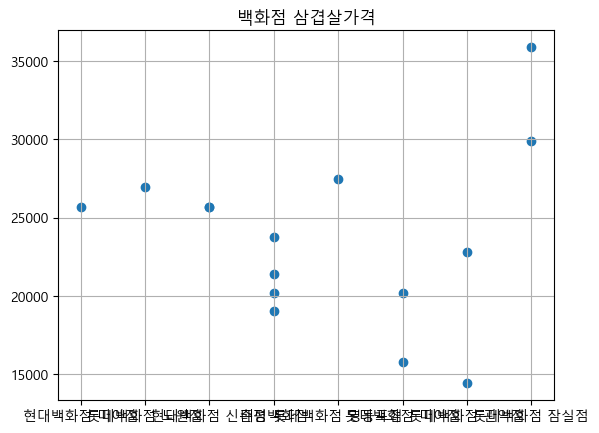

In [86]:
x=df_mart['시장/마트 이름']
y=df_mart['가격(원)']
plt.scatter(x,y)
plt.title(mart+' 삼겹살가격')
plt.grid()
plt.show()

In [138]:
df_egg=df[(df['품목 이름'].str.contains('달걀')) &
          (df['년도-월']=='2021-06') &
          (df['품목 이름'].str.contains('30'))]

In [139]:
#달걀 분석 21-6 데이터 규격 : 30개
df_items2 = df_egg[['품목 번호', '품목 이름','실판매규격', '가격(원)']]
df_items2[:30]

,품목 번호,품목 이름,실판매규격,가격(원)
11,320,달걀(30개),1.8kg,9500
28,320,달걀(30개),30개,0
43,320,달걀(30개),30개,10800
52,320,달걀(30개),30개,10500
62,320,달걀(30개),30개(1800g),6900
75,320,달걀(30개),30개,10800
82,320,달걀(30개),30개(1800g),6900
99,320,달걀(30개),1800g,12800
115,320,달걀(30개),30개,7950
138,320,달걀(30개),30개(1800g),6900


In [140]:
df_items2['가격(원)'].mean()

9006.852713178294

In [141]:
df_items2['가격(원)'].max()

75000

In [142]:
df_items2['가격(원)'].min()

0

In [143]:
df30 = df_egg[df_egg['가격(원)'] <= 6000]

In [144]:
df30[['가격(원)','시장/마트 이름']]

,가격(원),시장/마트 이름
28,0,현대백화점 미아점
1139,0,롯데백화점 청량리점
1477,5520,이마트 성수점
3953,0,롯데백화점 잠실점
3982,0,롯데백화점 잠실점
4049,0,롯데백화점 잠실점
4057,0,롯데백화점 잠실점
5002,0,롯데백화점 청량리점
5051,0,롯데백화점 청량리점
5092,0,롯데백화점 청량리점


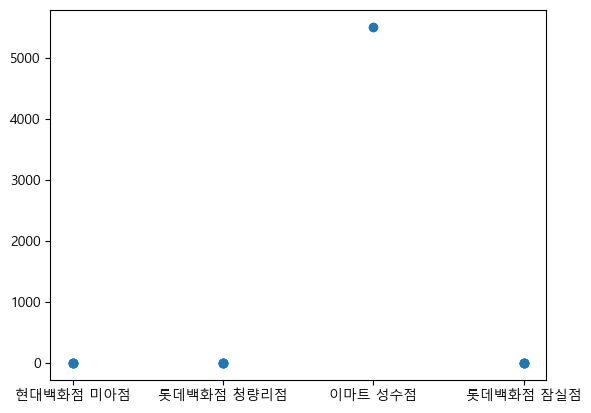

In [145]:
x=df30['시장/마트 이름']
y=df30['가격(원)']
plt.scatter(x,y)